# KNN - (K - Nearset Neighbour)

In [23]:
import pandas as pd 
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [24]:
df = pd.read_csv('Social_Network_Ads.csv')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    object 
 2   Age              400 non-null    float64
 3   EstimatedSalary  400 non-null    float64
 4   Purchased        400 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 15.8+ KB


In [26]:
df.shape

(400, 5)

In [27]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [28]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [29]:
df = pd.get_dummies(df,drop_first=True)

In [30]:
df.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19.0,19000.0,0,True
1,15810944,35.0,20000.0,0,True
2,15668575,26.0,43000.0,0,False
3,15603246,27.0,57000.0,0,False
4,15804002,19.0,76000.0,0,True


In [31]:
x = df[['Age','EstimatedSalary','Gender_Male']]
y = df[['Purchased']]

In [32]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=0)

In [33]:
# feature scaling

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_train[['Age','EstimatedSalary']] = sc.fit_transform(x_train[['Age','EstimatedSalary']])
x_test[['Age','EstimatedSalary']] = sc.transform(x_test[['Age','EstimatedSalary']])


In [34]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [35]:
y_pred = classifier.predict(x_test)

In [36]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [37]:
# Measure Accuracy

from sklearn.metrics import accuracy_score , confusion_matrix , precision_score , recall_score, f1_score

acc = accuracy_score(y_pred, y_test)
cf = confusion_matrix(y_pred,y_test)
precision = precision_score(y_pred,y_test)
recall = recall_score(y_pred,y_test)
f1_score = f1_score(y_pred,y_test)

<Axes: >

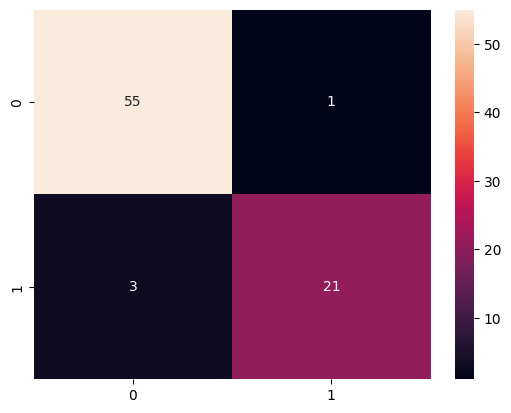

In [38]:
import seaborn as sns
sns.heatmap(cf,annot=True)

In [39]:
print("Acuuracy:", acc)
print("precision:",precision)
print("recall:", recall)
print("CF:",cf)
print("F1 Score:",f1_score)

Acuuracy: 0.95
precision: 0.9545454545454546
recall: 0.875
CF: [[55  1]
 [ 3 21]]
F1 Score: 0.9130434782608695


In [40]:
len(x_test)

80

In [41]:
#f1_score = (2 * precision + recall) / (precision+recall)
#print(f1_score)

In [42]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [43]:
y_test

,Purchased
132,0
309,0
341,0
196,0
246,0
...,...
14,0
363,0
304,0
361,1
